In [44]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from eda_utilities import print_eda_stats
from data_pipeline import dockless_data_pipeline
from data_pipeline import weather_data_pipeline

### Read the Dockless Mobility data and run basic null data analysis. 
##### Dockless mobility data is located on the s3 bucket at https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv
##### Weather data is located on the s3 bucket at https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv

In [2]:
# Read the dockless data from S3 bucket
# Load the data and and call the clean method automatically to call the work flow
dockless_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")
# Call the dockless_data_pipeline()
dockless_data_pipeline(dockless_data)
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

####  Trip duration - UOM in seconds, Trip distance - UOM in meters, Month - where 1 = January, etc.,  Hour - The hour of the day during which trip occurred, in local time (US/Central),  Day of Week - where Sunday = 0, and so on, 

In [3]:
#Read the weather data from S3 bucket
weather_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")
weather_data_pipeline(weather_data)
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")

+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

#### Weather Data Details. Precipitation - Units of Measure -  inches, Snow - Units of Measure - inches, Avg_Daily_Wind_Speed - Units of Measure - MPH, AVG_TEMPERATURE, MAX_TEMPERATURE, MIN_TEMPERATURE- Units of Measure - Degrees Fahrenheit

In [4]:
minimum_trip_duration = dockless_data['Trip Duration'].min() # minimum trip duration
maximum_trip_duration = dockless_data['Trip Duration'].max() # maximum trip duration
print("Minimum Trip Duration %s in seconds" % minimum_trip_duration)
print("Maximum Trip Duration %s in seconds" % maximum_trip_duration)
print("Uniques Trip Duration values %s" %len(dockless_data['Trip Duration'].unique()))

Minimum Trip Duration -431.0 in seconds
Maximum Trip Duration 1888695.0 in seconds
Uniques Trip Duration values 9773


In [5]:
minimum_trip_distance = dockless_data['Trip Distance'].min() # minimum trip distance
maximum_trip_distance = dockless_data['Trip Distance'].max() # maximum trip distance
print("Minimum Trip Distance %s in meters" % minimum_trip_distance)
print("Maximum Trip Distance %s in meters" % maximum_trip_distance)
print("Uniques Trip Distance values %s" %len(dockless_data['Trip Distance'].unique()))

Minimum Trip Distance -16724106.0 in meters
Maximum Trip Distance 2147479547.0 in meters
Uniques Trip Distance values 15441


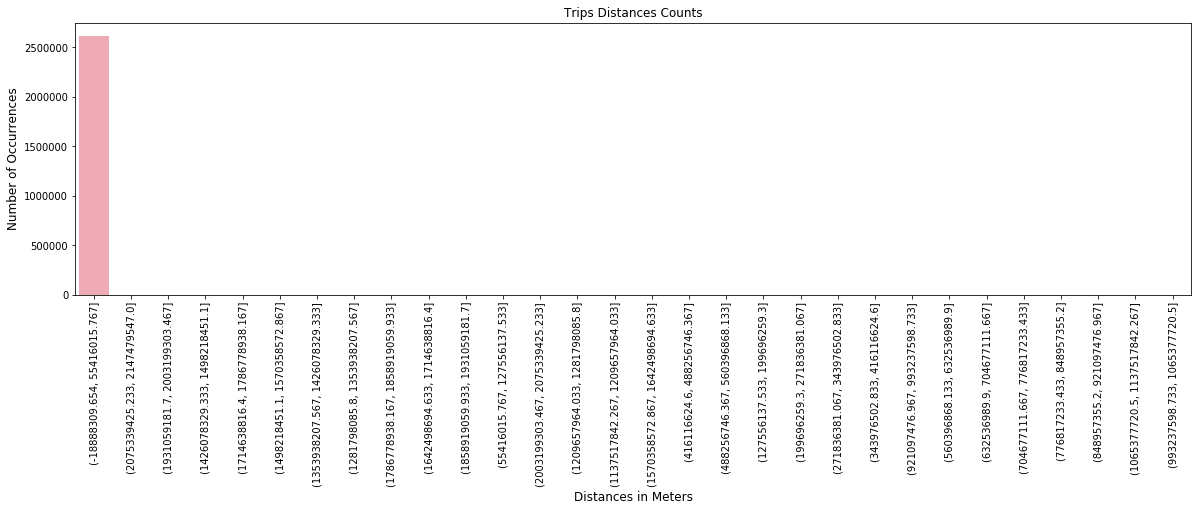

In [6]:
# Plotting a bar graph of the number of trips by distance
trip_distance_count  = dockless_data['Trip Distance'].value_counts(sort=True, ascending=False,bins=30)

plt.figure(figsize=(20,5))
sns.barplot(trip_distance_count.index, trip_distance_count.values, alpha=0.8)
plt.title('Trips Distances Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distances in Meters', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Distance_Counts.png')
plt.show()

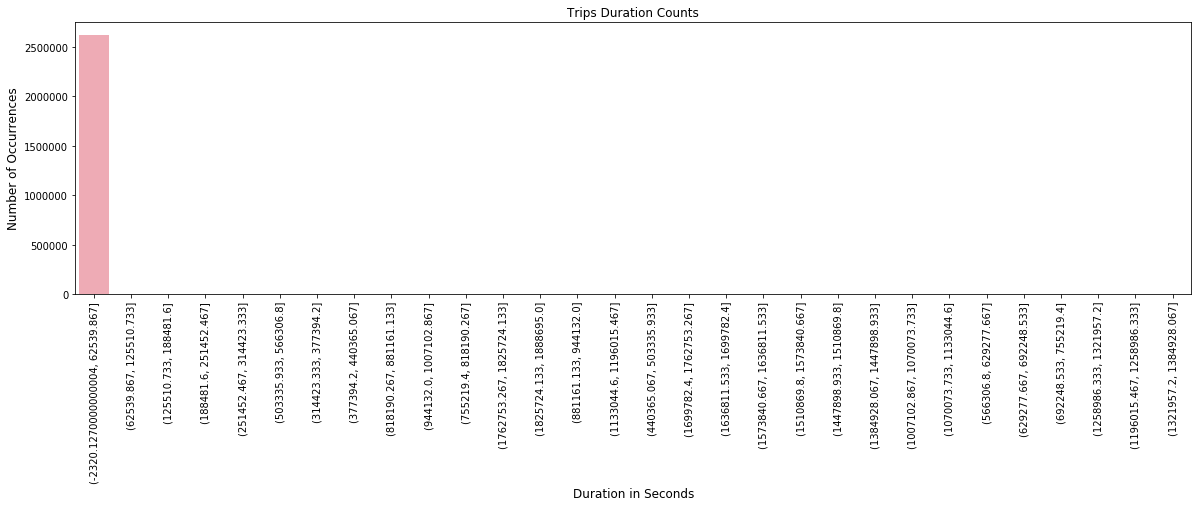

In [7]:
# Plotting a bar graph of the number of trips by distance
trip_duration_count  = dockless_data['Trip Duration'].value_counts(sort=True, ascending=False,bins=30)

plt.figure(figsize=(20,5))
sns.barplot(trip_duration_count.index, trip_duration_count.values, alpha=0.8)
plt.title('Trips Duration Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Duration in Seconds', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Duration_Counts.png')
plt.show()

##### Note that our official trip reporting metrics only include trips which meet the following criteria:
###### * trip distance greater than or equal to .1 miles and less than 500 miles
###### * trip duration less than 24 hours

In [8]:
# Count the number of trips with Zero Duration
trip_duration_count

(-2320.1270000000004, 62539.867]    2615021
(62539.867, 125510.733]                  60
(125510.733, 188481.6]                   30
(188481.6, 251452.467]                   13
(251452.467, 314423.333]                  4
(503335.933, 566306.8]                    3
(314423.333, 377394.2]                    2
(377394.2, 440365.067]                    2
(818190.267, 881161.133]                  2
(944132.0, 1007102.867]                   1
(755219.4, 818190.267]                    1
(1762753.267, 1825724.133]                1
(1825724.133, 1888695.0]                  1
(881161.133, 944132.0]                    1
(1133044.6, 1196015.467]                  1
(440365.067, 503335.933]                  0
(1699782.4, 1762753.267]                  0
(1636811.533, 1699782.4]                  0
(1573840.667, 1636811.533]                0
(1510869.8, 1573840.667]                  0
(1447898.933, 1510869.8]                  0
(1384928.067, 1447898.933]                0
(1007102.867, 1070073.733]      

In [9]:
trip_distance_count

(-18888309.654, 55416015.767]       2615085
(2075339425.233, 2147479547.0]           24
(1931059181.7, 2003199303.467]            5
(1426078329.333, 1498218451.1]            5
(1714638816.4, 1786778938.167]            3
(1498218451.1, 1570358572.867]            3
(1353938207.567, 1426078329.333]          3
(1281798085.8, 1353938207.567]            3
(1786778938.167, 1858919059.933]          2
(1642498694.633, 1714638816.4]            2
(1858919059.933, 1931059181.7]            2
(55416015.767, 127556137.533]             1
(2003199303.467, 2075339425.233]          1
(1209657964.033, 1281798085.8]            1
(1137517842.267, 1209657964.033]          1
(1570358572.867, 1642498694.633]          1
(416116624.6, 488256746.367]              1
(488256746.367, 560396868.133]            0
(127556137.533, 199696259.3]              0
(199696259.3, 271836381.067]              0
(271836381.067, 343976502.833]            0
(343976502.833, 416116624.6]              0
(921097476.967, 993237598.733]  

##### From the observations it is clear majority of the rides are in the trip distance [-18888309.654, 55416015.767] range. - 2615085 records
##### From the observations it is clear majority of the rides are in the trip duration (-2320.1270000000004, 62539.867] range. - 2615021 records

In [10]:
# Drop all records where  trip distance is less .1 miles and greater than 500 miles (1609.34 mts - 804673 mts)
df = dockless_data[(dockless_data['Trip Distance'] > 1609.34) & (dockless_data['Trip Distance'] < 804673)]


In [11]:
df.shape

(688387, 18)

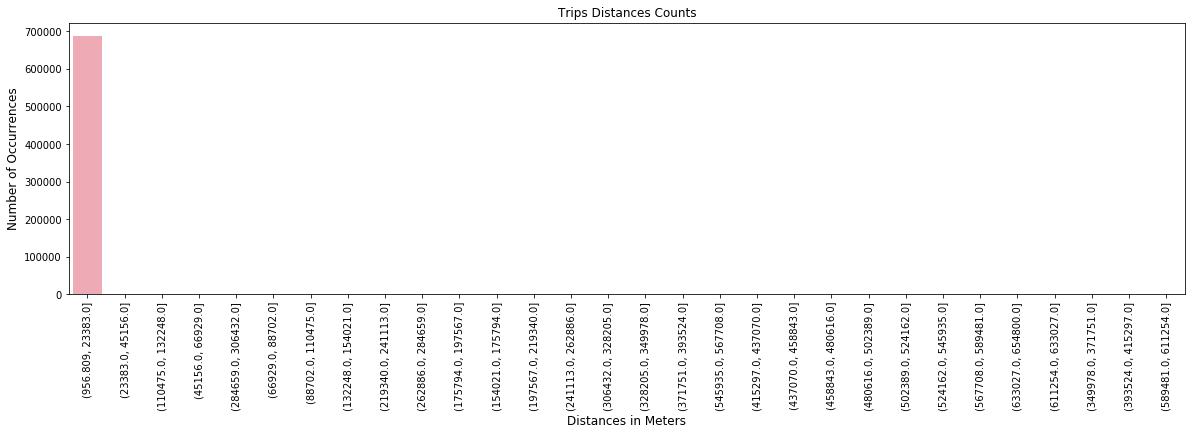

In [12]:
# Plotting a bar graph of the number of trips by distance
trip_distance_count  = df['Trip Distance'].value_counts(sort=True, ascending=False,bins=30)

plt.figure(figsize=(20,5))
sns.barplot(trip_distance_count.index, trip_distance_count.values, alpha=0.8)
plt.title('Trips Distances Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distances in Meters', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Distance_Counts_After_Removing_Invalid_Data.png')
plt.show()

In [13]:
trip_distance_count

(956.809, 23383.0]      688113
(23383.0, 45156.0]         165
(110475.0, 132248.0]        19
(45156.0, 66929.0]          18
(284659.0, 306432.0]        10
(66929.0, 88702.0]          10
(88702.0, 110475.0]          9
(132248.0, 154021.0]         7
(219340.0, 241113.0]         5
(262886.0, 284659.0]         5
(175794.0, 197567.0]         4
(154021.0, 175794.0]         2
(197567.0, 219340.0]         2
(241113.0, 262886.0]         2
(306432.0, 328205.0]         2
(328205.0, 349978.0]         2
(371751.0, 393524.0]         2
(545935.0, 567708.0]         2
(415297.0, 437070.0]         1
(437070.0, 458843.0]         1
(458843.0, 480616.0]         1
(480616.0, 502389.0]         1
(502389.0, 524162.0]         1
(524162.0, 545935.0]         1
(567708.0, 589481.0]         1
(633027.0, 654800.0]         1
(611254.0, 633027.0]         0
(349978.0, 371751.0]         0
(393524.0, 415297.0]         0
(589481.0, 611254.0]         0
Name: Trip Distance, dtype: int64

In [14]:
df = df[(dockless_data['Trip Duration'] > 60) & (dockless_data['Trip Duration'] < 86400)]
df.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(688246, 18)

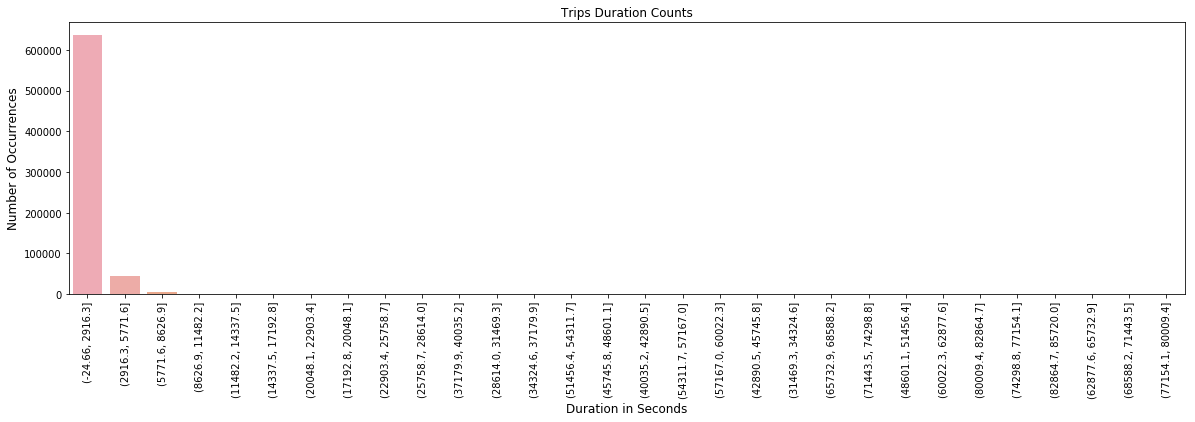

In [15]:
# Plotting a bar graph of the number of trips by distance
trip_duration_count  = df['Trip Duration'].value_counts(sort=True, ascending=False,bins=30)

plt.figure(figsize=(20,5))
sns.barplot(trip_duration_count.index, trip_duration_count.values, alpha=0.8)
plt.title('Trips Duration Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Duration in Seconds', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Duration_Counts_After_Removing_Invalid_Data.png')
plt.show()

In [16]:
trip_duration_count

(-24.66, 2916.3]      635929
(2916.3, 5771.6]       45077
(5771.6, 8626.9]        5572
(8626.9, 11482.2]       1078
(11482.2, 14337.5]       284
(14337.5, 17192.8]        80
(20048.1, 22903.4]        68
(17192.8, 20048.1]        38
(22903.4, 25758.7]        37
(25758.7, 28614.0]        12
(37179.9, 40035.2]         9
(28614.0, 31469.3]         9
(34324.6, 37179.9]         9
(51456.4, 54311.7]         7
(45745.8, 48601.1]         6
(40035.2, 42890.5]         4
(54311.7, 57167.0]         4
(57167.0, 60022.3]         4
(42890.5, 45745.8]         3
(31469.3, 34324.6]         3
(65732.9, 68588.2]         3
(71443.5, 74298.8]         3
(48601.1, 51456.4]         2
(60022.3, 62877.6]         2
(80009.4, 82864.7]         1
(74298.8, 77154.1]         1
(82864.7, 85720.0]         1
(62877.6, 65732.9]         0
(68588.2, 71443.5]         0
(77154.1, 80009.4]         0
Name: Trip Duration, dtype: int64

In [17]:
df[df['Trip Duration'] < 0]

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE


In [18]:
minimum_trip_distance = df['Trip Distance'].min() # minimum trip distance
maximum_trip_distance = df['Trip Distance'].max() # maximum trip distance
print("Minimum Trip Distance %s in meters" % minimum_trip_distance)
print("Maximum Trip Distance %s in meters" % maximum_trip_distance)
print("Uniques Trip Distance values %s" %len(df['Trip Distance'].unique()))

Minimum Trip Distance 1610.0 in meters
Maximum Trip Distance 654800.0 in meters
Uniques Trip Distance values 13250


In [19]:
minimum_trip_duration = df['Trip Duration'].min() # minimum trip duration
maximum_trip_duration = df['Trip Duration'].max() # maximum trip duration
print("Minimum Trip Duration %s in seconds" % minimum_trip_duration)
print("Maximum Trip Duration %s in seconds" % maximum_trip_duration)
print("Uniques Trip Duration values %s" %len(df['Trip Duration'].unique()))

Minimum Trip Duration 61.0 in seconds
Maximum Trip Duration 85720.0 in seconds
Uniques Trip Duration values 9389


In [20]:
df['Origin Cell ID'].value_counts(sort=True, ascending=False)

014706    14201
014705    13650
014864    13176
014707    13175
015019    11791
014865    10888
014391     9038
014385     9017
014863     8848
015018     8117
014078     7531
014548     7517
014549     7500
015021     7446
015022     7423
014393     6836
014546     6257
015179     5996
014226     5846
014550     5361
014866     5322
014235     5264
014077     4949
014234     4715
014225     4701
015186     4680
015017     4599
014871     4534
014384     4472
014867     4302
          ...  
021704        1
010424        1
018688        1
019178        1
14841         1
14834         1
022756        1
16315         1
019123        1
021296        1
018627        1
007755        1
010104        1
018089        1
018369        1
017274        1
015226        1
017043        1
014051        1
012463        1
14726         1
019310        1
14732         1
14739         1
012387        1
14743         1
014052        1
14763         1
14764         1
14040         1
Name: Origin Cell ID, Le

In [21]:
df.shape

(688246, 18)

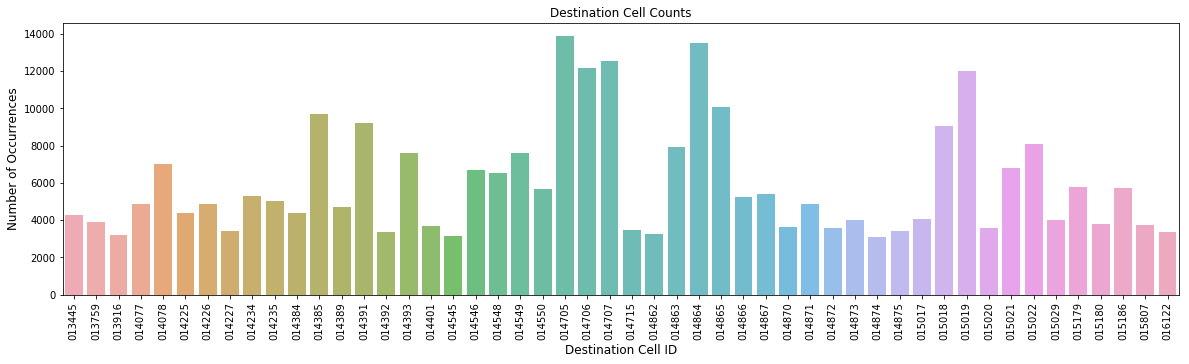

In [22]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
destinaton_cell_count  = df['Destination Cell ID'].value_counts(sort=True, ascending=False)

destination_cell_count = destinaton_cell_count[:50,]
plt.figure(figsize=(20,5))
sns.barplot(destination_cell_count.index, destination_cell_count.values, alpha=0.8)
plt.title('Destination Cell Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Destination Cell ID', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Destination_Cell_Counts.png')
plt.show()

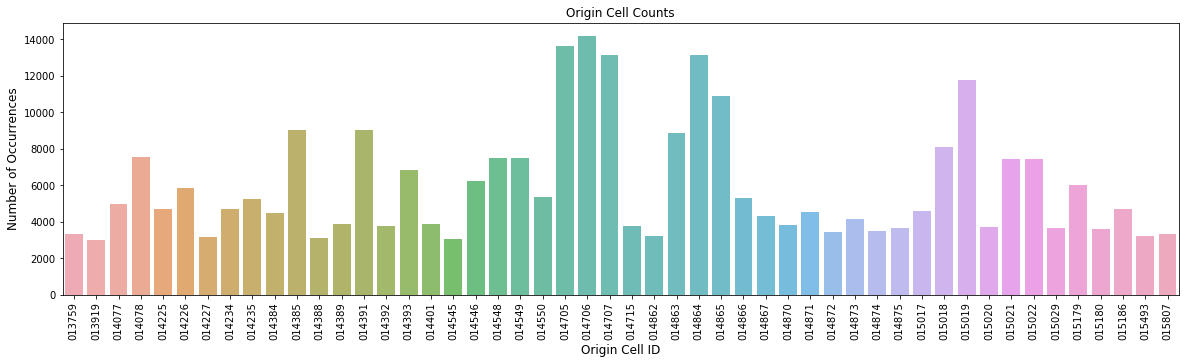

In [24]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
origin_cell_count  = df['Origin Cell ID'].value_counts(sort=True, ascending=False)

origin_cell_count = origin_cell_count[:50,]
plt.figure(figsize=(20,5))
sns.barplot(origin_cell_count.index, origin_cell_count.values, alpha=0.8)
plt.title('Origin Cell Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Origin Cell ID', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Origin_Cell_Counts.png')
plt.show()

In [26]:
origin_cell_count

014706    14201
014705    13650
014864    13176
014707    13175
015019    11791
014865    10888
014391     9038
014385     9017
014863     8848
015018     8117
014078     7531
014548     7517
014549     7500
015021     7446
015022     7423
014393     6836
014546     6257
015179     5996
014226     5846
014550     5361
014866     5322
014235     5264
014077     4949
014234     4715
014225     4701
015186     4680
015017     4599
014871     4534
014384     4472
014867     4302
014873     4129
014389     3889
014401     3862
014870     3806
014392     3773
014715     3750
015020     3726
015029     3661
014875     3656
015180     3603
014874     3516
014872     3461
015807     3323
013759     3320
014862     3246
015493     3227
014227     3147
014388     3133
014545     3027
013919     2997
Name: Origin Cell ID, dtype: int64

In [27]:
destinaton_cell_count  = df['Destination Cell ID'].value_counts(sort=True, ascending=False)

In [28]:
destination_cell_count = destinaton_cell_count[:-100,]

In [29]:
destination_cell_count

014705    13893
014864    13496
014707    12565
014706    12144
015019    12000
014865    10091
014385     9723
014391     9208
015018     9058
015022     8095
014863     7920
014549     7618
014393     7605
014078     7035
015021     6805
014546     6715
014548     6527
015179     5801
015186     5708
014550     5645
014867     5382
014234     5276
014866     5229
014235     5039
014871     4876
014077     4871
014226     4840
014389     4690
014225     4403
014384     4384
          ...  
010101        1
018968        1
019484        1
015383        1
017581        1
014045        1
014776        1
016797        1
018357        1
012948        1
012572        1
005401        1
007433        1
009168        1
017568        1
020451        1
017041        1
019344        1
017291        1
016973        1
007742        1
021395        1
019615        1
017611        1
013072        1
015145        1
013257        1
020116        1
003528        1
012732        1
Name: Destination Cell I

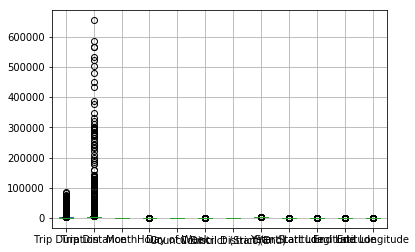

In [60]:
df.boxplot()

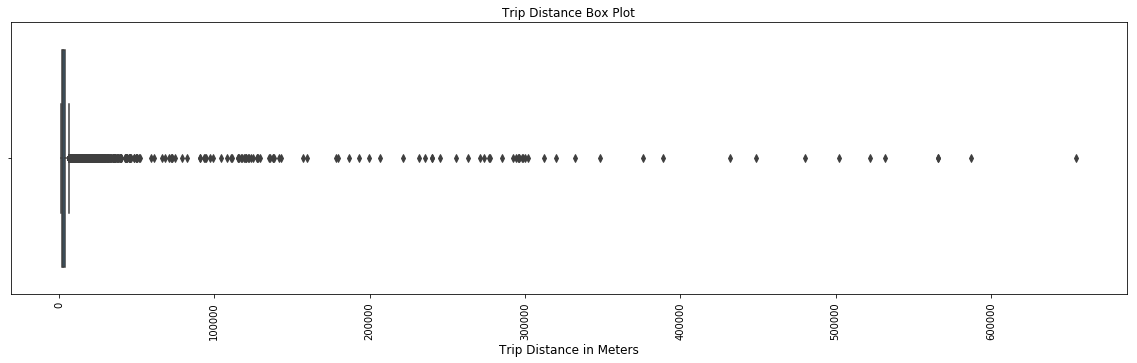

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Trip Distance'])
plt.title('Trip Distance Box Plot')
plt.xlabel('Trip Distance in Meters', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Distance_Box_Plot.png')
plt.show()



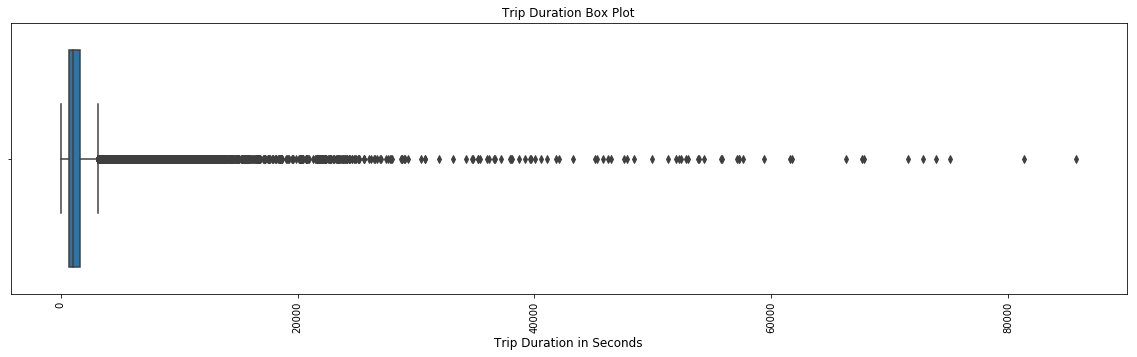

In [35]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Trip Duration'])
plt.title('Trip Duration Box Plot')
plt.xlabel('Trip Duration in Seconds', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Duration_Box_Plot.png')
plt.show()

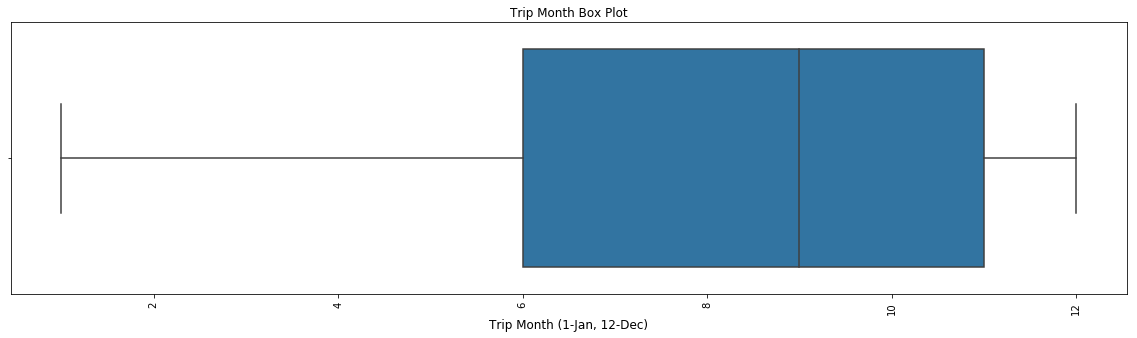

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Month'])
plt.title('Trip Month Box Plot')
plt.xlabel('Trip Month (1-Jan, 12-Dec)', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Month_Box_Plot.png')
plt.show()

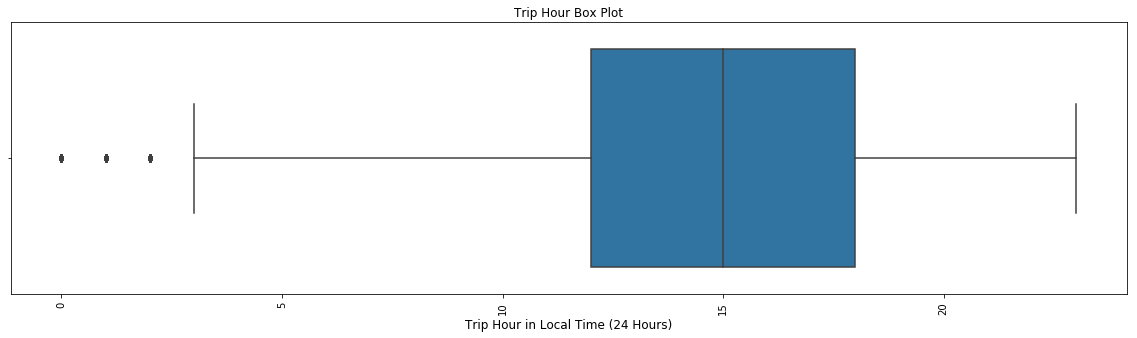

In [41]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Hour'])
plt.title('Trip Hour Box Plot')
plt.xlabel('Trip Hour in Local Time (24 Hours)', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Hour_Box_Plot.png')
plt.show()

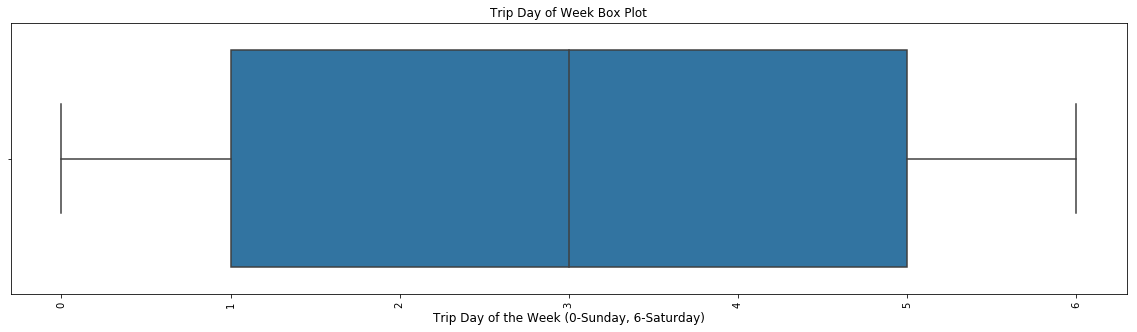

In [42]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Day of Week'])
plt.title('Trip Day of Week Box Plot')
plt.xlabel('Trip Day of the Week (0-Sunday, 6-Saturday)', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Day_Of_Week_Box_Plot.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


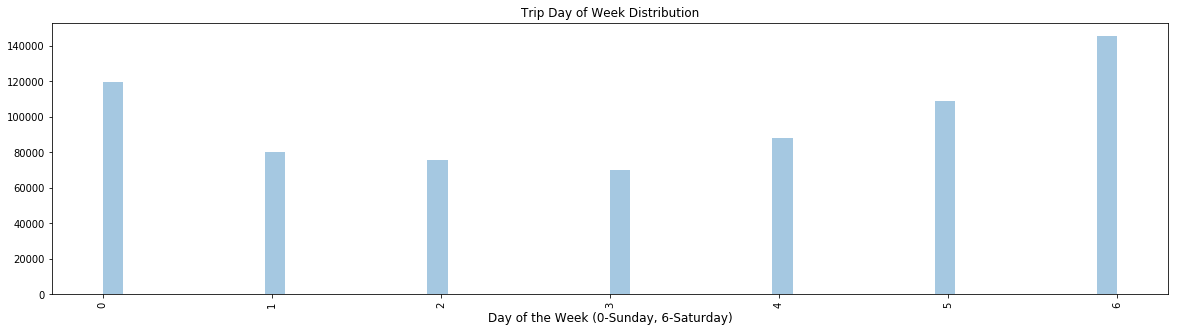

In [49]:
plt.figure(figsize=(20,5))
x=df['Day of Week']
sns.distplot(x, kde=False);
plt.title('Trip Day of Week Distribution')
plt.xlabel('Day of the Week (0-Sunday, 6-Saturday)', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Day_Of_Week_Distribution.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


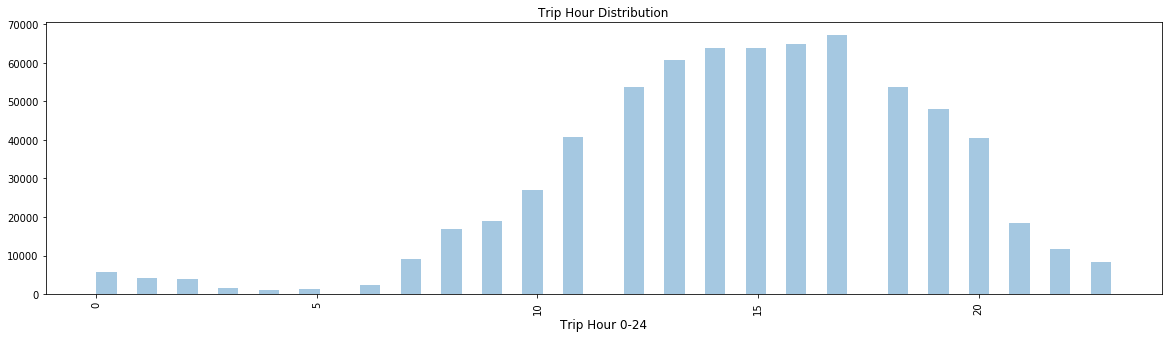

In [50]:
plt.figure(figsize=(20,5))
x=df['Hour']
sns.distplot(x, kde=False);
plt.title('Trip Hour Distribution')
plt.xlabel('Trip Hour 0-24', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Hour_Distribution.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


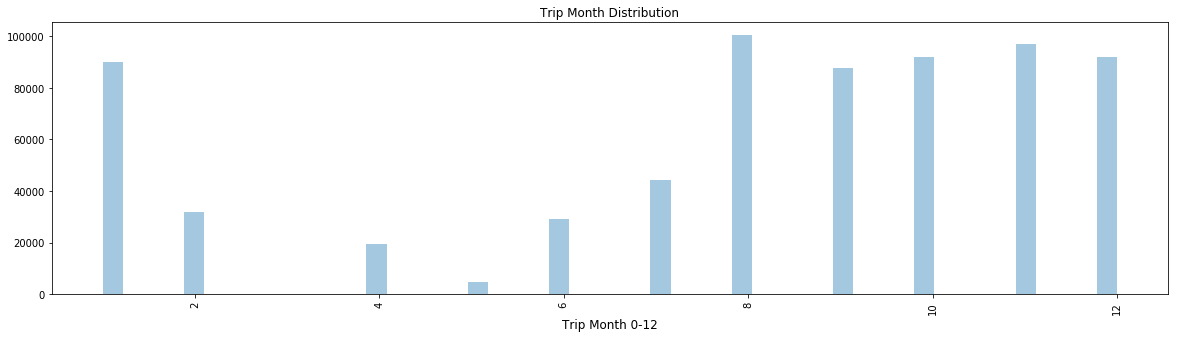

In [51]:
plt.figure(figsize=(20,5))
x=df['Month']
sns.distplot(x, kde=False);
plt.title('Trip Month Distribution')
plt.xlabel('Trip Month 0-12', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Month_Distribution.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


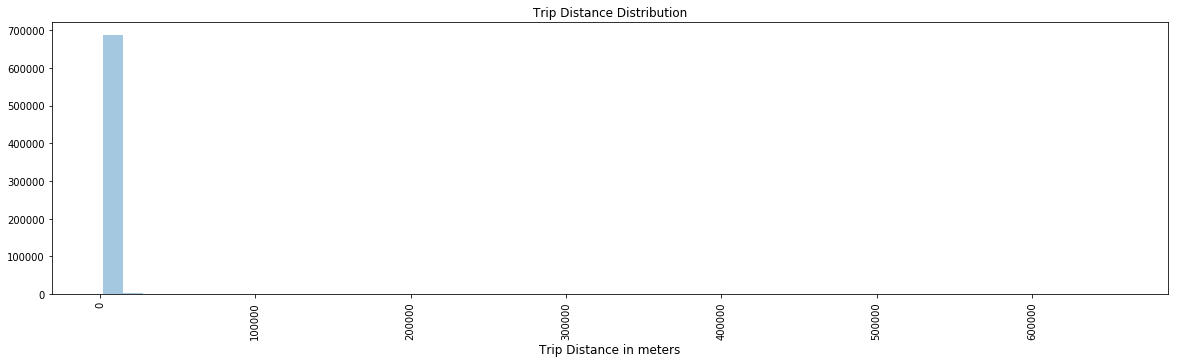

In [52]:
plt.figure(figsize=(20,5))
x=df['Trip Distance']
sns.distplot(x, kde=False);
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance in meters', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Distance_Distribution.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


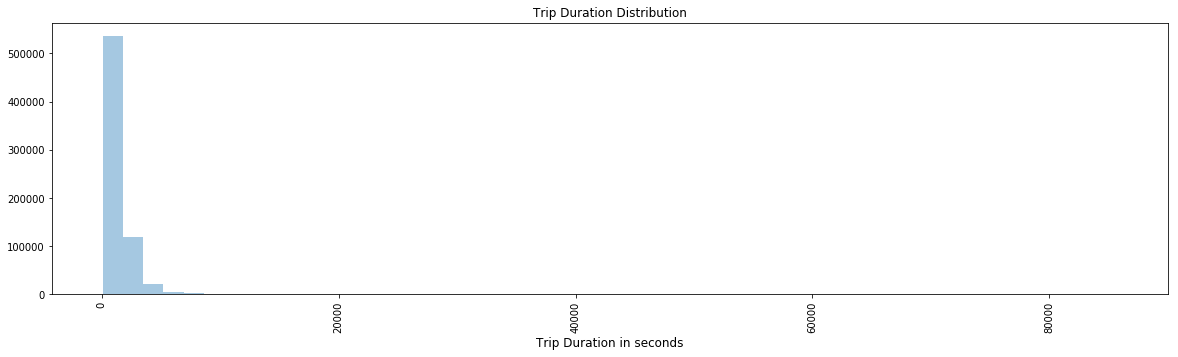

In [53]:
plt.figure(figsize=(20,5))
x=df['Trip Duration']
sns.distplot(x, kde=False);
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration in seconds', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Duration_Distribution.png')
plt.show()

KeyboardInterrupt: 

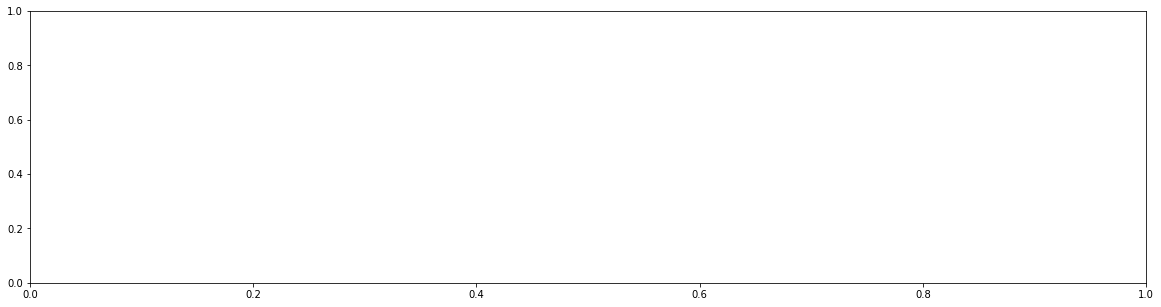

In [54]:
plt.figure(figsize=(20,5))
x=df['Origin Cell ID']
sns.distplot(x, kde=False);
plt.title('Trip Origin Cell ID Distribution')
plt.xlabel('Trip Origin Cell ID', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Origin_Cell_ID_Distribution.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
x=df['Destination Cell ID']
sns.distplot(x, kde=False);
plt.title('Trip Destination Cell ID Distribution')
plt.xlabel('Trip Destination Cell ID', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_Destination_Cell_ID_Distribution.png')
plt.show()